In [1]:
# Import required libraries
# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import datetime library
from datetime import date

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Data Input and Inspection

In [2]:
#input dataset
house_df = pd.read_csv("train.csv")

house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Null value % for each column is given below

In [5]:
round((house_df.isnull().sum()/len(house_df.index))*100,2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

### Checking statistical information (min, max, mean, median, percentiles etc.) of dataset

In [6]:
house_df.describe(percentiles = [0.25, 0.50, 0.75, 0.95])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### If we see , we can observe huge difference between 95% metric and upper metric boundaries which indicates that there are outliers and irregular trends present

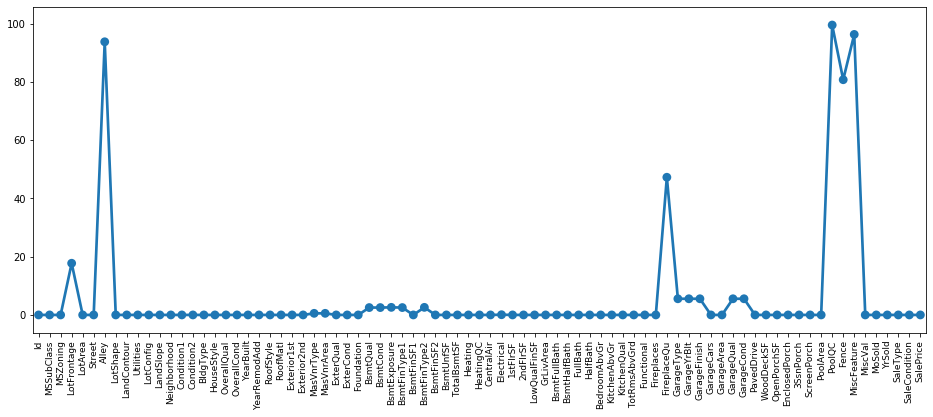

In [7]:
# plot the pointplot for the dataset
plt.figure(figsize = (16,6))

sns.pointplot(house_df.columns, round((house_df.isnull().sum()/len(house_df.index))*100,2))

plt.xticks(rotation =90,fontsize =9)

plt.show()

In [8]:
# Row-wise null value % given below
round(100*(house_df.isnull().sum(axis = 1)/house_df.shape[1]),2)

0       6.17
1       4.94
2       4.94
3       4.94
4       4.94
        ... 
1455    4.94
1456    3.70
1457    2.47
1458    6.17
1459    6.17
Length: 1460, dtype: float64

# Data Cleaning

- **Delete High Null Columns:** Dropping columns which are having huge % missing values
- **Missing Value Treatement:** Treating missing values by imputing necessary metrics for columns
    - For the numerical columns, imputing with `mean` value, if `no outliers` present
    - If `outlier exists`, we will impute those number columns with `median`
    - For categorical columns, `dropping highly skwed` columns
    - For meaning full missing, creating `new category` for imputing missing value
    - Also, for some column like `MasVnrType` and `Electrical` are imputed with `mode` values

In [9]:
# as we observed in above plot,The below 4 columns are having huge % of biased values where null means -
# houses dont have the feature values
cols= ['PoolQC','MiscFeature','Alley','Fence']
house_df.drop(cols, axis=1, inplace=True)

#removing Id column as it cant be helped in predictions
house_df.drop('Id', axis=1, inplace=True)

house_df.shape

(1460, 76)

In [10]:
round((house_df.isnull().sum()/len(house_df.index))*100,3).sort_values(ascending=False)

FireplaceQu      47.260
LotFrontage      17.740
GarageCond        5.548
GarageType        5.548
GarageYrBlt       5.548
                  ...  
CentralAir        0.000
HeatingQC         0.000
SaleCondition     0.000
TotalBsmtSF       0.000
MSSubClass        0.000
Length: 76, dtype: float64

In [11]:
# Segregating Categorical & Numerical Values
cat_col = house_df.select_dtypes(include =["object"]).columns.values

num_col = house_df.select_dtypes(include =["int64","float64"]).columns.values

print("Categorical Features : \n {} \n\n".format(cat_col))
print("Numerical Features : \n {} ".format(num_col))

Categorical Features : 
 ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'SaleType' 'SaleCondition'] 


Numerical Features : 
 ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 

In [12]:
# columns with null values among numeric cols
ncols = house_df[num_col].isnull().sum()
ncols[ncols>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### Deal with the null valued columns

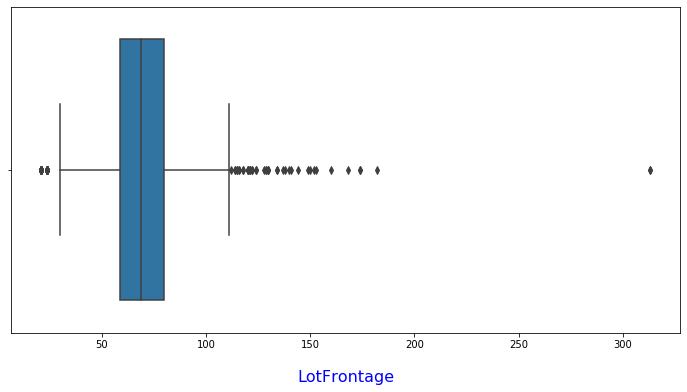

In [13]:
plt.figure(figsize = (12,6))
plt.xlabel('LotFrontage',fontsize = 16, color = 'blue', labelpad = 20)
    
# Plotting box plot using seaborn library
sns.boxplot(house_df['LotFrontage'])

plt.show()

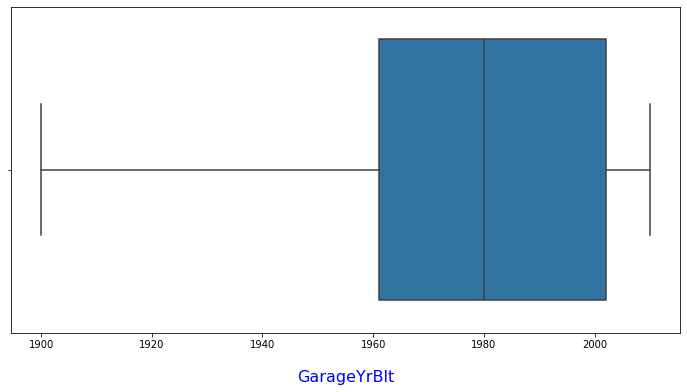

In [14]:
plt.figure(figsize = (12,6))
plt.xlabel('GarageYrBlt',fontsize = 16, color = 'blue', labelpad = 20)
    
# Plotting box plot using seaborn library
sns.boxplot(house_df['GarageYrBlt'])

plt.show()

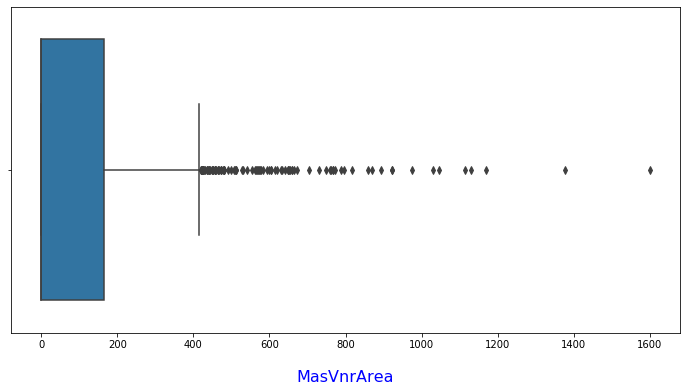

In [15]:
plt.figure(figsize = (12,6))
plt.xlabel('MasVnrArea',fontsize = 16, color = 'blue', labelpad = 20)
    
# Plotting box plot using seaborn library
sns.boxplot(house_df['MasVnrArea'])

plt.show()

In [16]:
# since we saw outliers , we are imputing median for 2 variables and mode for garage built yr 
house_df['MasVnrArea']= house_df.MasVnrArea.fillna(house_df.MasVnrArea.median())
house_df['GarageYrBlt']= house_df.GarageYrBlt.fillna(house_df.GarageYrBlt.mode()[0])
house_df['LotFrontage']= house_df.LotFrontage.fillna(house_df.LotFrontage.median())

In [17]:
ccols = house_df[cat_col].isnull().sum()
ccols[ccols>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### Deal with the null valued columns

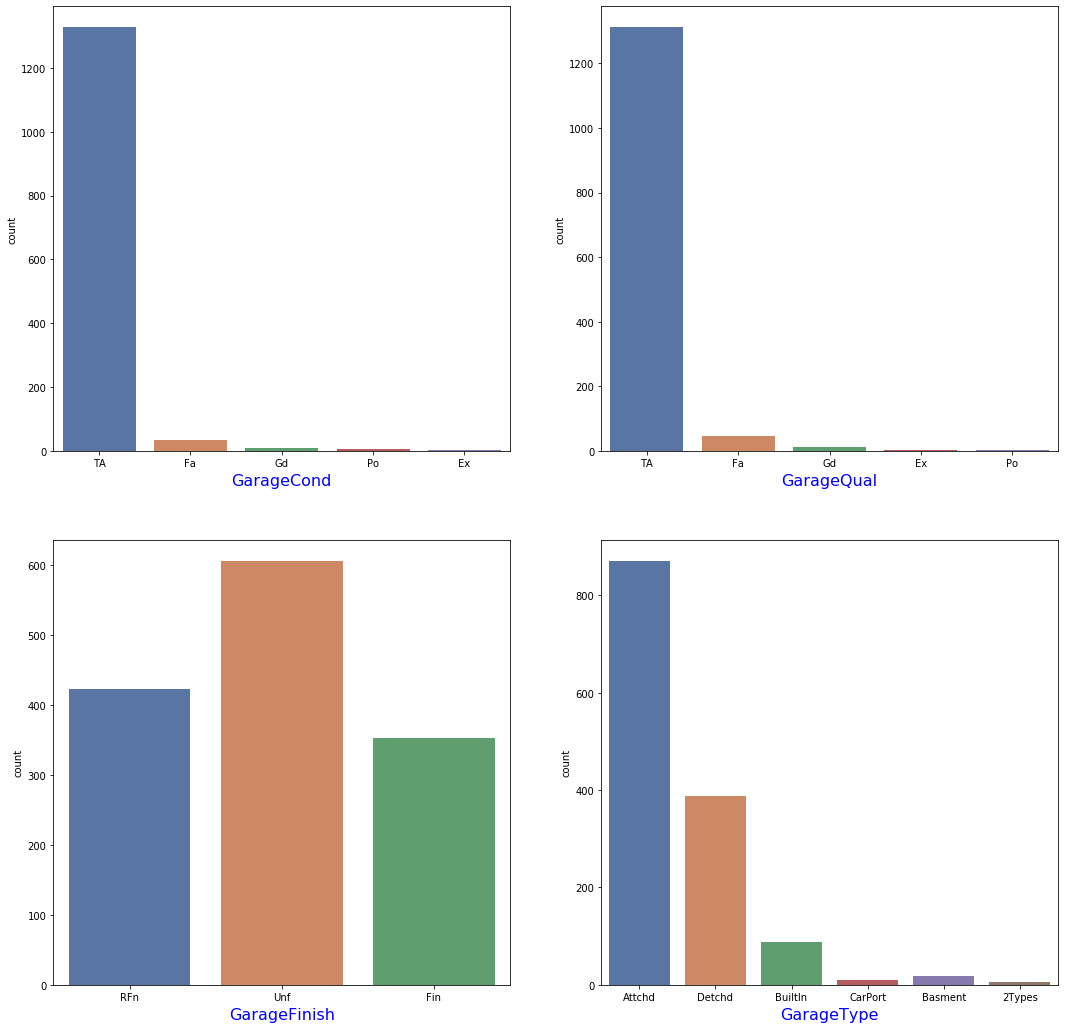

In [18]:
plt.figure(figsize = (18,18))

plt.subplot(2,2,1)
sns.countplot(house_df['GarageCond'], palette = 'deep')
plt.xlabel('GarageCond',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,2)
sns.countplot(house_df['GarageQual'], palette = 'deep')
plt.xlabel('GarageQual',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,3)
sns.countplot(house_df['GarageFinish'], palette = 'deep')
plt.xlabel('GarageFinish',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,2,4)
sns.countplot(house_df['GarageType'], palette = 'deep')
plt.xlabel('GarageType',fontsize = 16, color = 'blue', labelpad = 5)

plt.show()

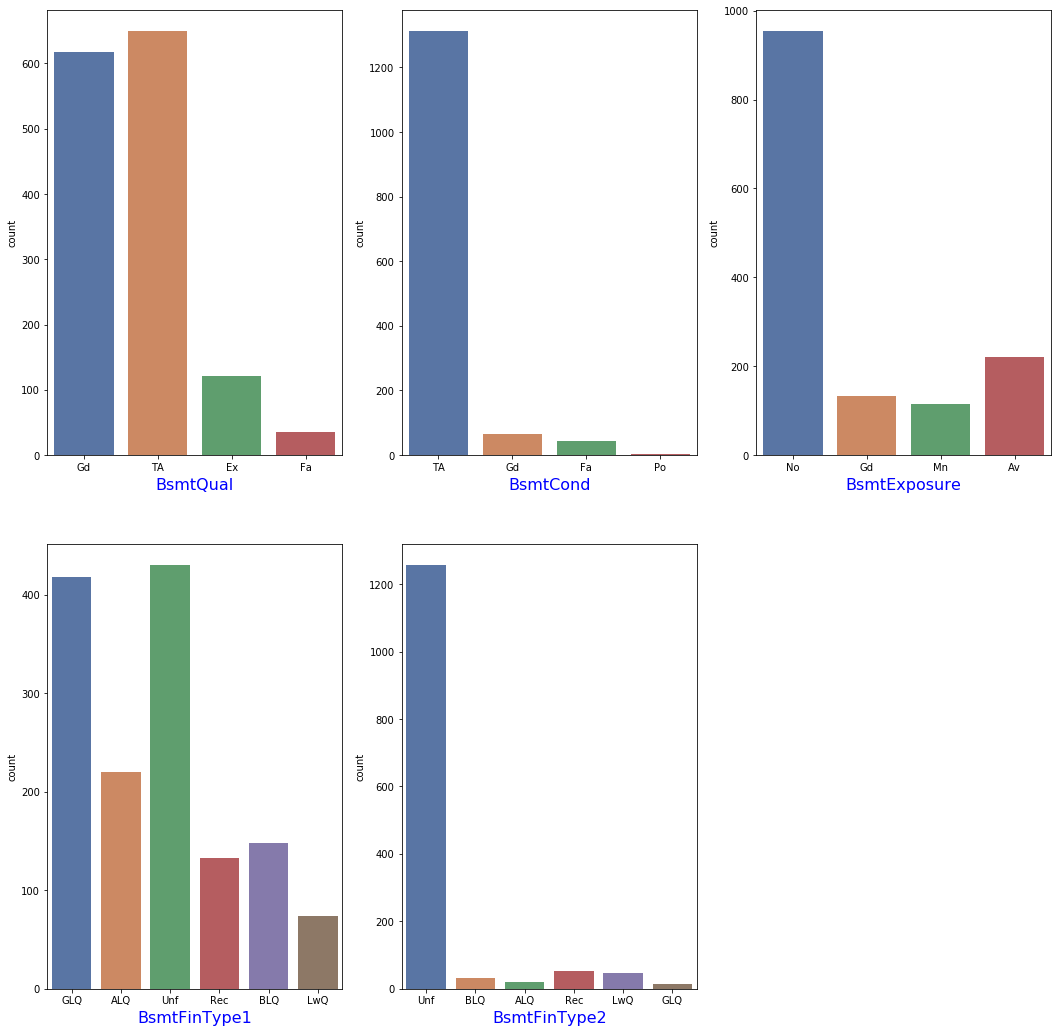

In [19]:
plt.figure(figsize = (18,18))

plt.subplot(2,3,1)
sns.countplot(house_df['BsmtQual'], palette = 'deep')
plt.xlabel('BsmtQual',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,2)
sns.countplot(house_df['BsmtCond'], palette = 'deep')
plt.xlabel('BsmtCond',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,3)
sns.countplot(house_df['BsmtExposure'], palette = 'deep')
plt.xlabel('BsmtExposure',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,4)
sns.countplot(house_df['BsmtFinType1'], palette = 'deep')
plt.xlabel('BsmtFinType1',fontsize = 16, color = 'blue', labelpad = 5)

plt.subplot(2,3,5)
sns.countplot(house_df['BsmtFinType2'], palette = 'deep')
plt.xlabel('BsmtFinType2',fontsize = 16, color = 'blue', labelpad = 5)

plt.show()

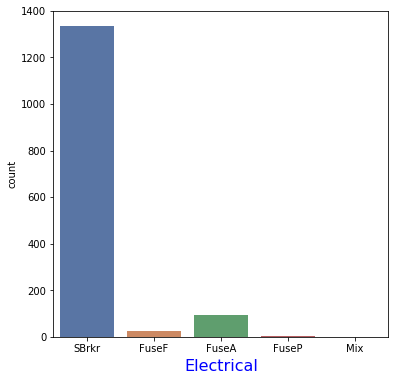

In [20]:
plt.figure(figsize = (6,6))
sns.countplot(house_df['Electrical'], palette = 'deep')
plt.xlabel('Electrical',fontsize = 16, color = 'blue', labelpad = 5)
plt.show()

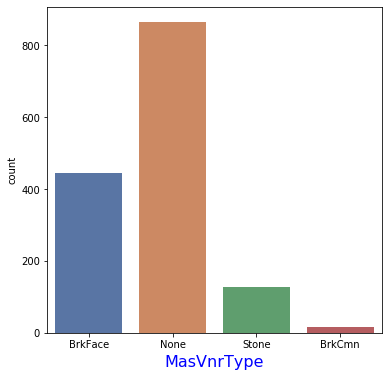

In [21]:
plt.figure(figsize = (6,6))
sns.countplot(house_df['MasVnrType'], palette = 'deep')
plt.xlabel('MasVnrType',fontsize = 16, color = 'blue', labelpad = 5)
plt.show()

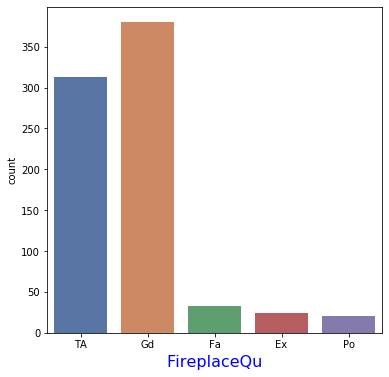

In [22]:
plt.figure(figsize = (6,6))
sns.countplot(house_df['FireplaceQu'], palette = 'deep')
plt.xlabel('FireplaceQu',fontsize = 16, color = 'blue', labelpad = 5)
plt.show()

In [23]:
# Replacing null with No, when the house doesn't have the basement
house_df['BsmtExposure'] = house_df['BsmtExposure'].fillna('No')
house_df['BsmtFinType2'] = house_df['BsmtFinType2'].fillna('No')
house_df['BsmtFinType1'] = house_df['BsmtFinType1'].fillna('No')
house_df['BsmtCond'] = house_df['BsmtCond'].fillna('No')
house_df['BsmtQual'] = house_df['BsmtQual'].fillna('No')

# Replacing null with mode value
# MasVnrType : only 8 none values
# Electrical : only 1 none values
house_df['MasVnrType'] = house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0])
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

# Replacing null with No, when the house doesn't have the garrage
house_df['GarageType'] = house_df['GarageType'].fillna('No')
house_df['GarageFinish'] = house_df['GarageFinish'].fillna('No')
house_df['GarageCond'] = house_df['GarageCond'].fillna('No')
house_df['GarageQual'] = house_df['GarageQual'].fillna('No')

# Replacing null with No, when the house doesn't have the Fireplace
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No')

In [24]:
#check missing values again
house_df.isnull().sum()[house_df.isnull().sum()>0]

Series([], dtype: int64)

In [25]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_df['HouseAge'] = house_df.YrSold - house_df.YearBuilt

#Drop YrSold, YearBuilt after HouseAge
house_df=house_df.drop(columns=['YrSold', 'YearBuilt'])

In [26]:
#convert ExterQual 0,1,2,3,4,5 -> No ,Po, Fa, TA, Gd, Ex
house_df = house_df.replace({'ExterQual':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtQual 0,1,2,3,4,5 -> NA/No, Po, Fa, TA, Gd, Ex
house_df = house_df.replace({'BsmtQual':{'No':0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert BsmtExposure 0,1,2,3,4 -> NA/No, No, Mn, Av, gd
house_df = house_df.replace({'BsmtExposure':{'No':0,'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA/No, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_df = house_df.replace({'BsmtFinType1':{'No':0,'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#convert HeatingQC 0,1,2,3,4,5 -> No,Po, Fa, TA, Gd, Ex
house_df = house_df.replace({'HeatingQC':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert KitchenQual 0,1,2,3,4,5 -> No,Po, Fa, TA, Gd, Ex
house_df = house_df.replace({'KitchenQual':{'No':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#convert FireplaceQu 0,1,2,3,4,5 -> NA/No, Po, Fa, TA, Gd, Ex
house_df = house_df.replace({'FireplaceQu':{'No':0,'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

### we check now how the data is distributed for each column

In [27]:
for c in house_df.columns:
    if house_df[c].dtype == np.object :
        print(c)
        print(house_df[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

## If you carefully observe the above distributions, even though many columns dont have null values, we can observe the bias present in the data. The columns have the same data value for nearly 70% - 80% of the times or even more
## So , we Drop columns which have more bias data

In [28]:
house_df=house_df.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond'
                                    , 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [29]:
cat_col = house_df.select_dtypes(include =["object"]).columns.values

num_col = house_df.select_dtypes(include =["int64","float64"]).columns.values

ccols = house_df[cat_col].isnull().sum()
ncols = house_df[num_col].isnull().sum()

### The case we saw above is for categorical variables, but if we consider numeric, it'll be harder to distinguishing,bias ranges, so for now let us consider all of numeric features

# Variables Analysis

- Categorical  vs. Target Variable
- Nummerical vs. Target Variable

In [30]:
ncols

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
SalePrice        0
HouseAge         0
dtype: int64

In [31]:
ccols

MSZoning        0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
Foundation      0
BsmtCond        0
GarageType      0
GarageFinish    0
GarageQual      0
PavedDrive      0
dtype: int64

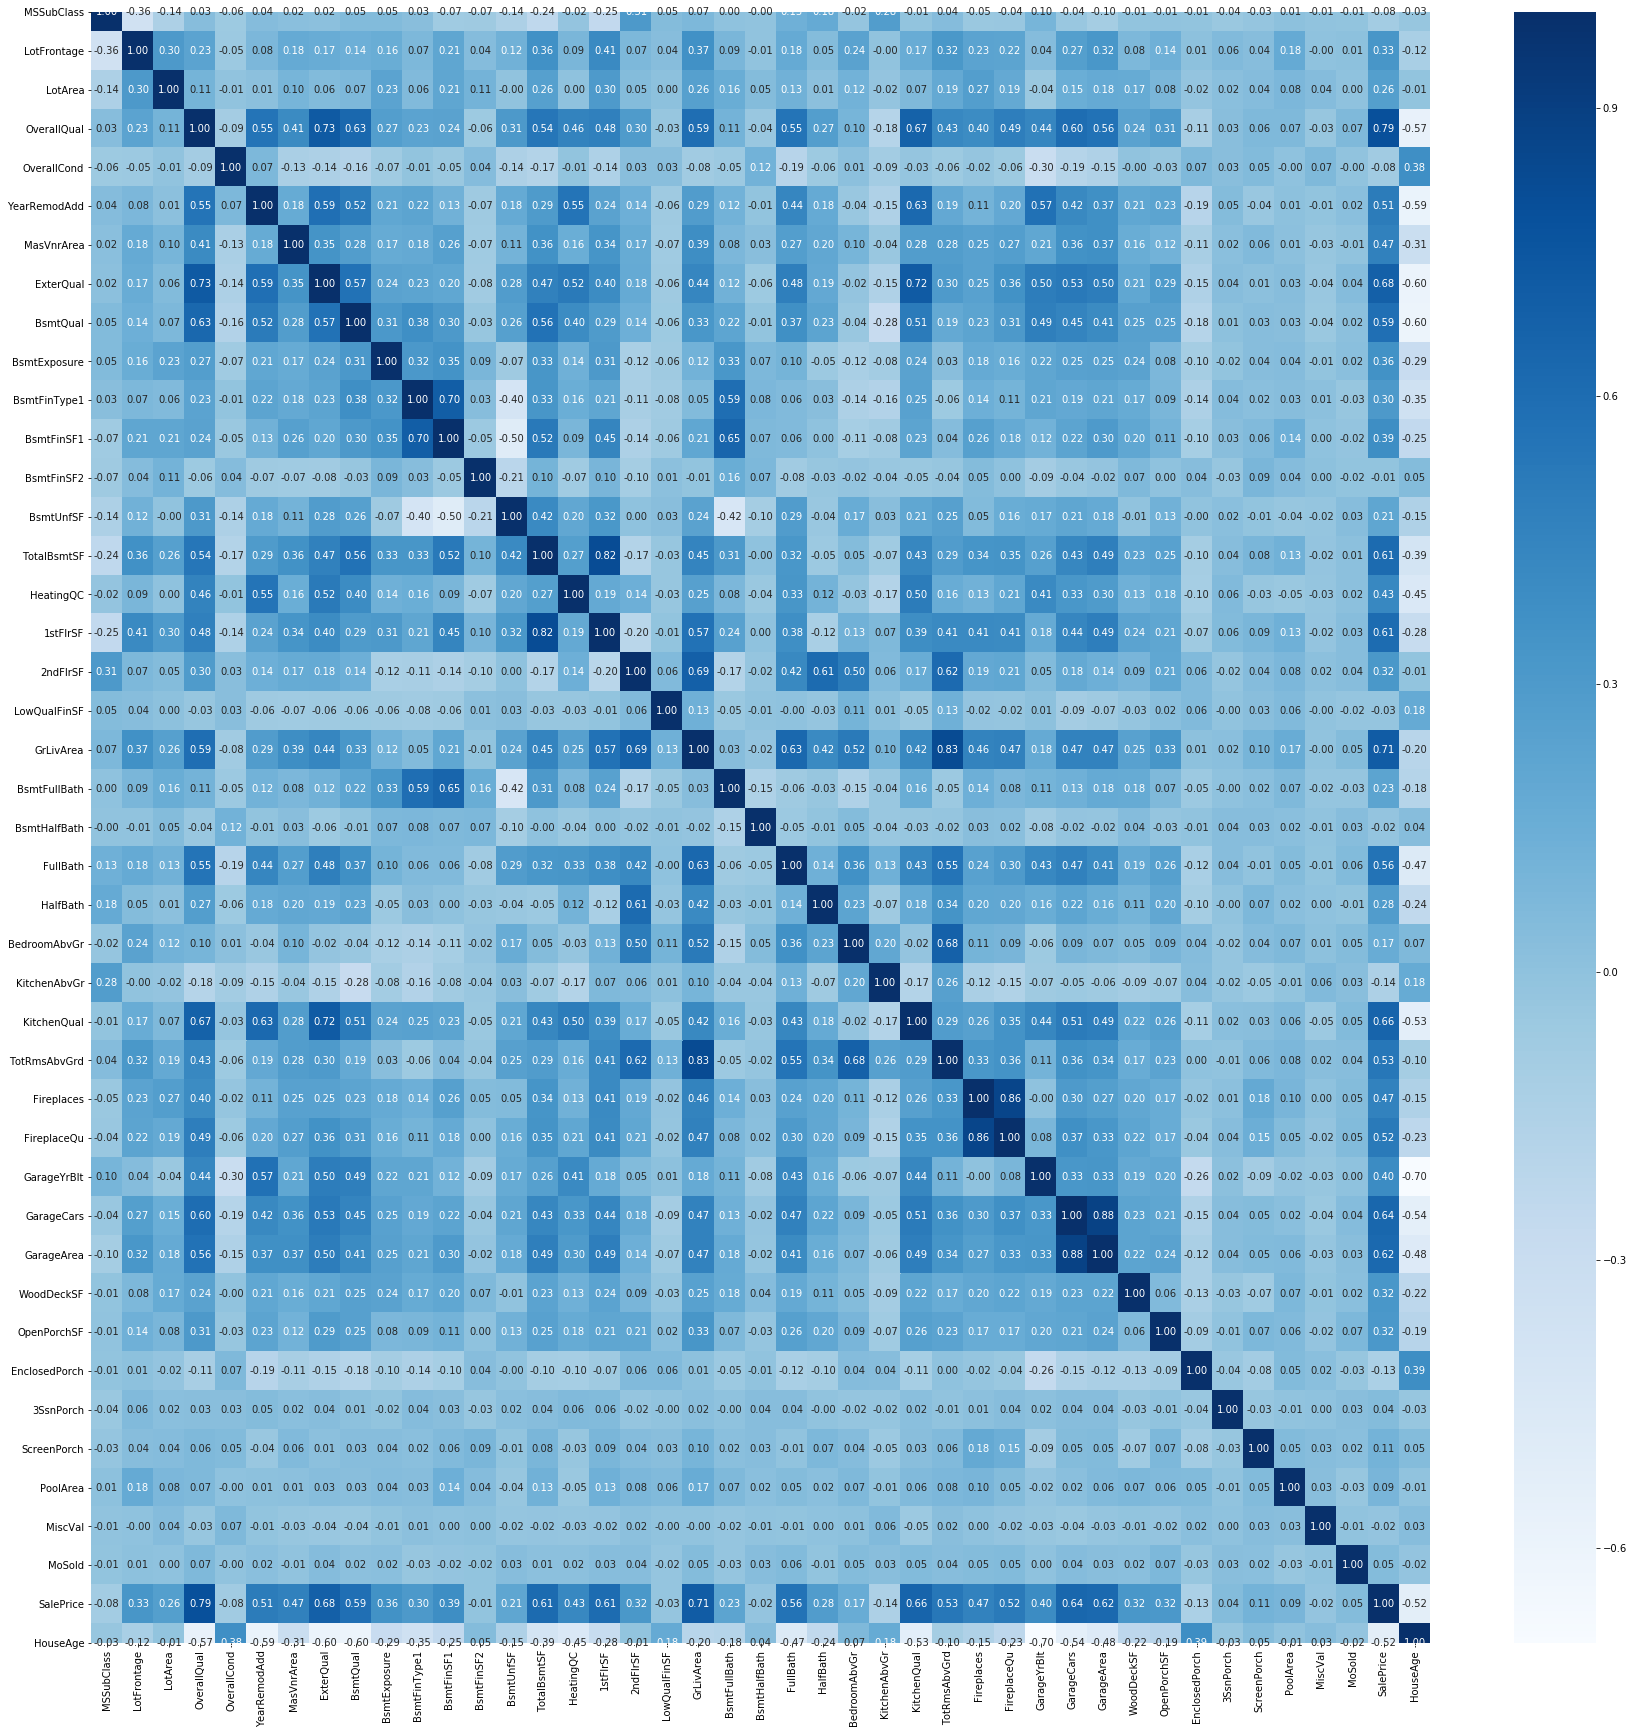

In [32]:
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(house_df.corr(), annot = True, cmap = 'Blues', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

#### Here we can see many variables with good correlations , many have positive correlations and many have negative correlatons, we can handle in furthur session

In [33]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null int64
Foundation       1460 non-null object
BsmtQual         1460 non-null int64
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null int64
BsmtFinType1     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-n

#### Categorical vs. Target Variable

- Remaining Category cols
- ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle','Exterior1st',         'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish','BsmtCond', 'PavedDrive', 'GarageQual']

In [34]:
objcols= ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
          'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish',
          'BsmtCond', 'PavedDrive', 'GarageQual']

In [35]:
def boxplotmulti(df,column):

    plt.figure(figsize = (30,30))
    i=1
    for col in enumerate(list(column)):
        plt.subplot(4,4,i)
        i = i+1
        # Plotting box plot using seaborn
        sns.boxplot(df[col[1]], df['SalePrice'], palette = 'deep')
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)

        plt.xticks(fontsize = 10, rotation = 90)

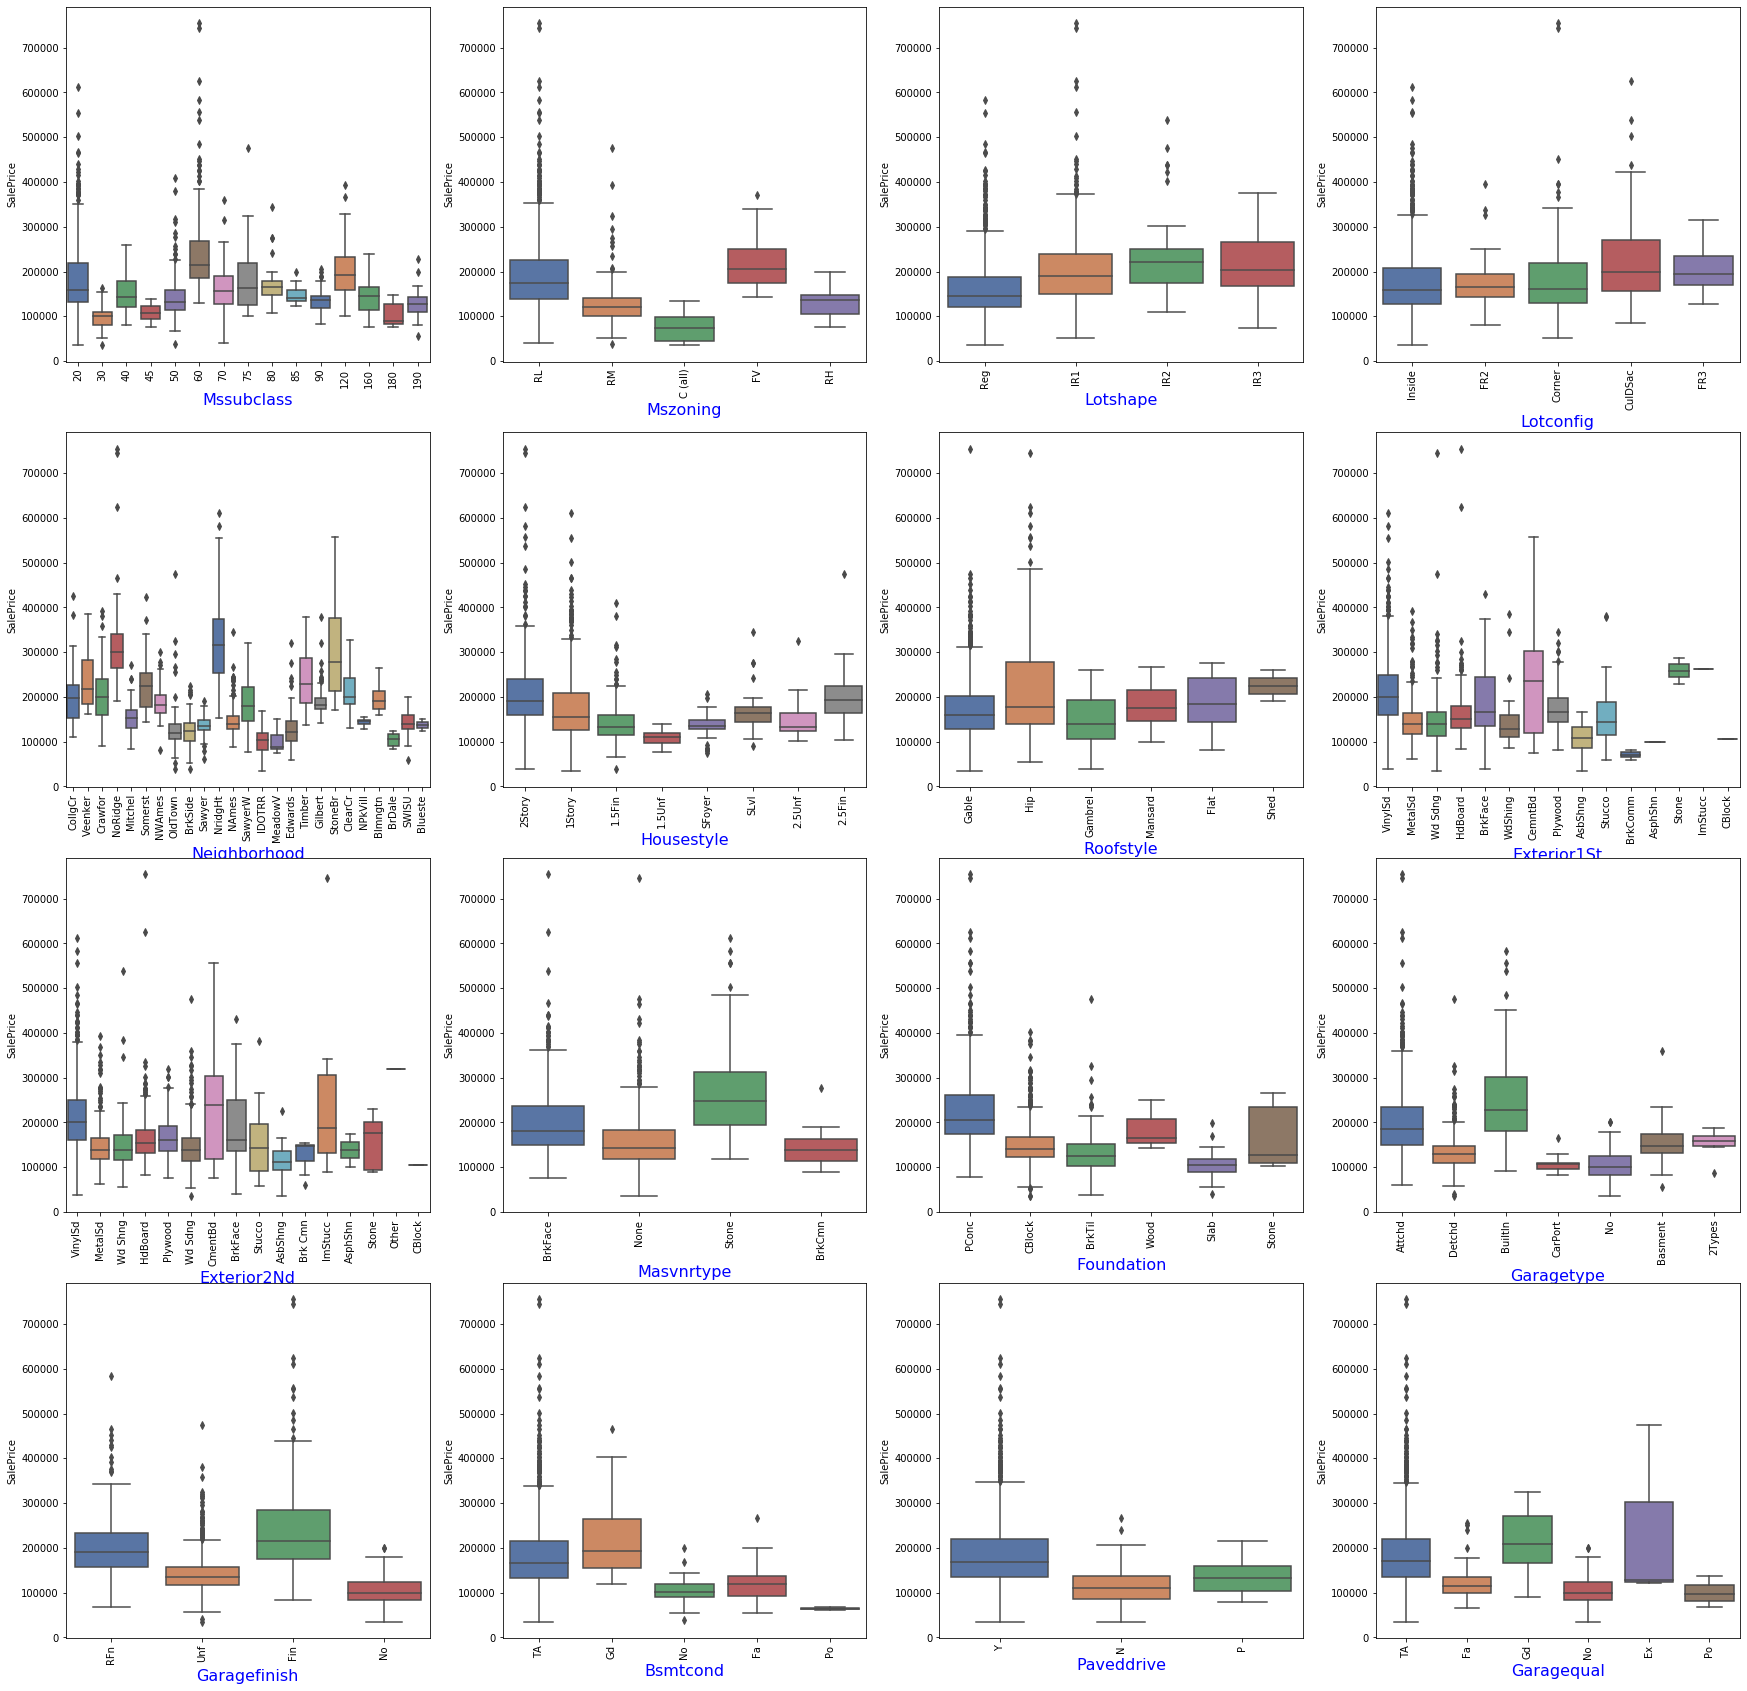

In [36]:
boxplotmulti(house_df, objcols)
plt.show()

#### Inference:

- `MasVnrType`, we can see that the housing sales price is high where Masonry veneer type is `Stone`

- `MSZoning`, we can see that the housing sales price is `high` at `Residential Low Density and Floating Village Residential zones`

- `Foundation`, we can see that the housing sales price is high where Type of foundation is `Poured Contrete`

- `GarageFinish`, we can see that the housing sales price is high where interior finish of the garage is `Finished`

- `GarageType`, we can see that the housing sales price is high where garage location is `Built-In (Garage part of house - typically has room above garage)`


- `RoofStyle`, we can see that the housing sales price is high for `Hip` type of roof and low for `Gable` type of roof

- `MSSubClass`, we can see that the housing sales price is `high` for `2-STORY PUD - 1946 & NEWER` type of dwelling
- etc such inferences

#### Nummerical vs. Target Variable

In [37]:
def scatterplotmulti(df,column):

    plt.figure(figsize = (30,30))
    i=1
    for col in enumerate(list(column)):
        plt.subplot(6,6,i)
        i = i+1
        # Plotting box plot using seaborn
        sns.scatterplot(df[col[1]],df['SalePrice'])

        plt.xticks(fontsize = 10, rotation = 90)

In [38]:
num_cols =  ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1' ,'BsmtFinSF2',
 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr' ,'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea' ,'WoodDeckSF' ,'OpenPorchSF' ,'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch' ,'PoolArea', 'MiscVal' ,'MoSold','HouseAge'] 

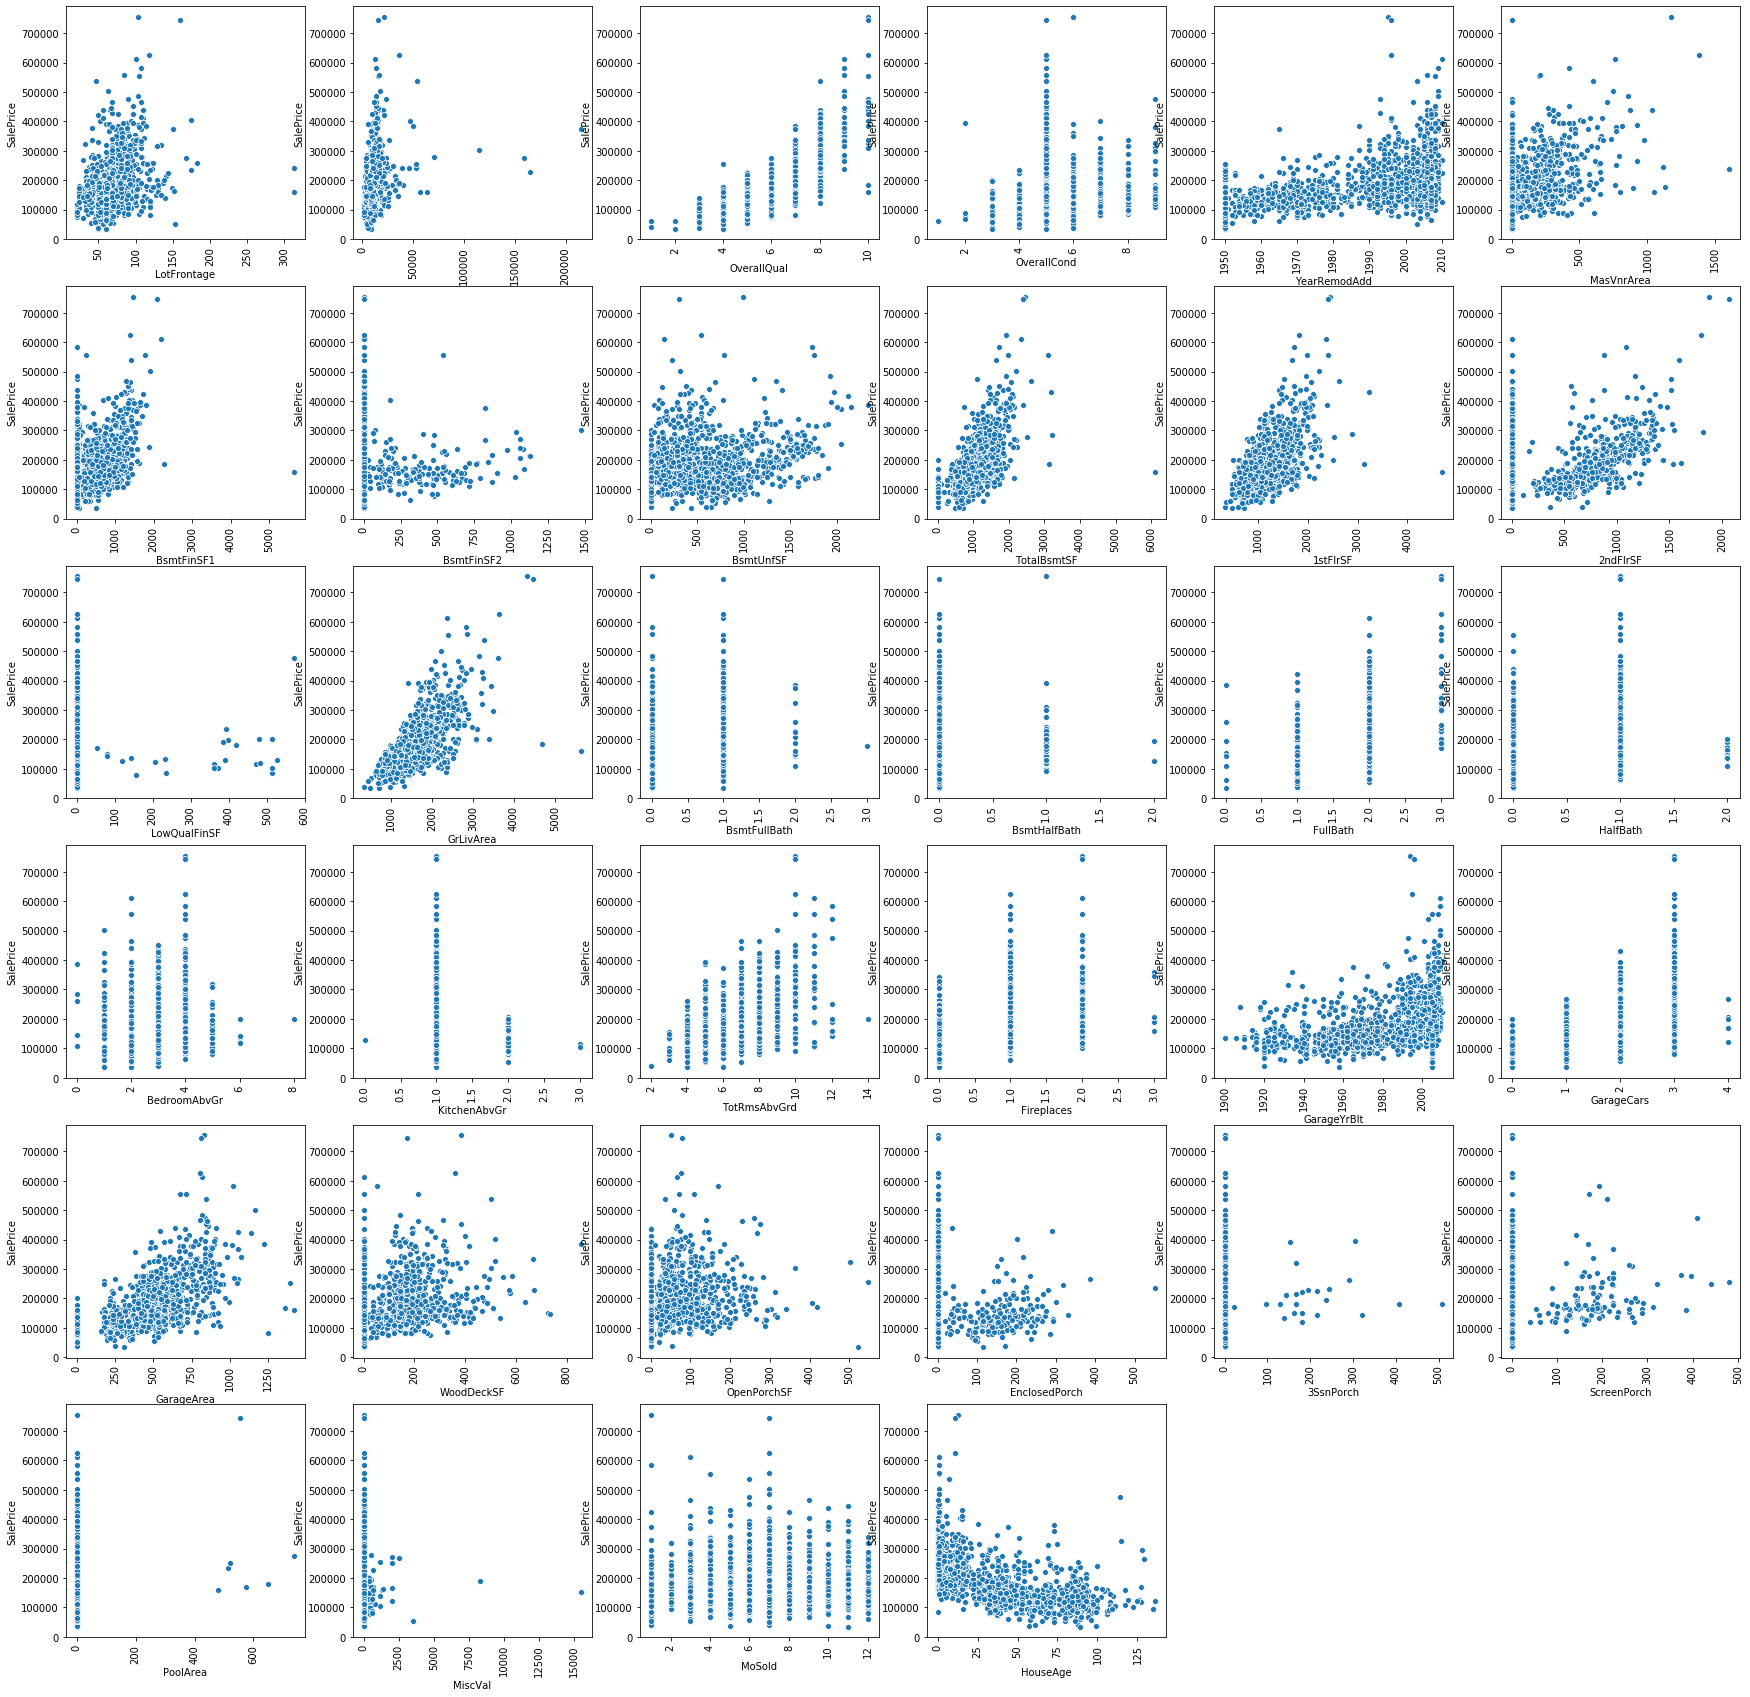

In [39]:
scatterplotmulti(house_df, num_cols)
plt.show()

#### Inference:
    - Many of the features have a noticeable patterns with target variable (such as 1stFlrSF,TotalBsmtSF etc ) and         some doesnt give any inference or relation notable with target

In [40]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,2,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,5,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,9,223500,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,2,140000,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,250000,8


### Data Preparation:

- Variable Transformation
- Create dummies for categorical variable
- Perform train test split
- Scalling

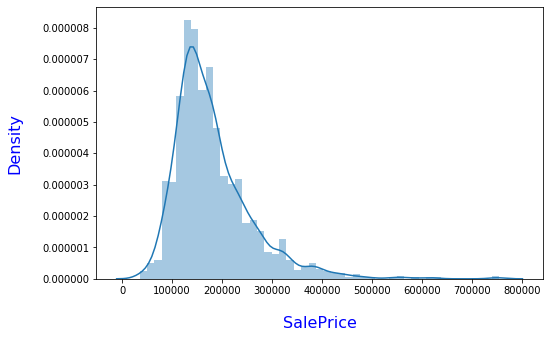

In [41]:
# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(house_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()


- From the above distribution plot, we can see that the distribution of Target variable `SalePrice` is not normal. It is right skwed.Hence, we are performing **Log Transformation** on the target column, so that the distribution becomes `Normal`

In [42]:
# Performing Log transformation on Target variable 'SalePrice'
house_df['SalePrice'] = np.log(house_df['SalePrice'])

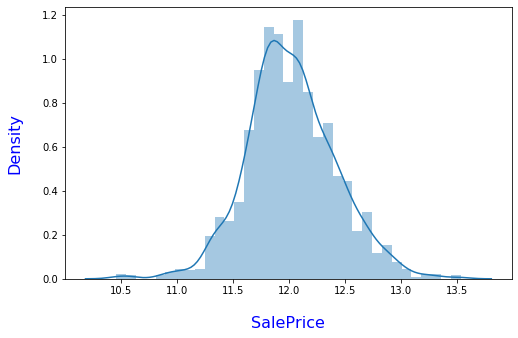

In [43]:
# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(house_df['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

- Above distribution plot dipicts that, after log transformation the distribution of Target variable `SalePrice` is become almost `normal`

In [44]:
dummy_df= pd.get_dummies(house_df[objcols], drop_first = True)

In [45]:
dummy_df.shape

(1460, 105)

In [46]:
house_df = pd.concat([house_df,dummy_df],axis=1)

In [47]:
house_df=house_df.drop(columns=objcols)

In [48]:
house_df.shape

(1460, 146)

In [49]:
house_df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'BsmtCond_No', 'BsmtCond_Po', 'BsmtCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_No',
       'GarageQual_Po', 'GarageQual_TA'],
      dtype='object', length=146)

## Train-Test Split

In [50]:
# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection, cross validation etc.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

In [51]:
traindf, testdf = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [52]:
y_test = testdf.pop('SalePrice')
X_test = testdf

In [53]:
y_train = traindf.pop('SalePrice')
X_train = traindf

In [54]:
X_train.shape

(1021, 145)

In [55]:
X_test.shape

(438, 145)

In [56]:
# Using Standard scaler
sc = StandardScaler()

In [57]:
# Fitting and transforming numerical columns and storing back into original train dataset
X_train[num_cols] = sc.fit_transform(X_train[num_cols])

X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,PavedDrive_P,PavedDrive_Y,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA
210,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,3,3,1,3,0.043512,-0.293313,-0.374367,-0.430911,3,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,3,-0.935650,-0.925422,0,1.002130,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.529604,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
318,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,4,4,4,6,1.160345,-0.293313,-0.454644,0.621579,5,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,4,1.556976,0.623522,3,0.516080,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,-0.677573,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
239,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,3,3,1,2,-0.761296,-0.293313,0.171964,-0.712011,3,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,3,0.310663,0.623522,4,-1.266101,-1.029498,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.936631,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
986,-0.477806,-0.502297,-0.

In [58]:
# Creating linear regression object for performing RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Perform recursive feature elimination (RFE) with 50 features
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [59]:
# RFE selected 50 columns for modelling
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 45),
 ('LotArea', False, 25),
 ('OverallQual', True, 1),
 ('OverallCond', False, 65),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 80),
 ('ExterQual', False, 59),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 9),
 ('BsmtFinType1', False, 32),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 27),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 5),
 ('BsmtHalfBath', False, 67),
 ('FullBath', False, 70),
 ('HalfBath', False, 74),
 ('BedroomAbvGr', False, 8),
 ('KitchenAbvGr', False, 16),
 ('KitchenQual', False, 6),
 ('TotRmsAbvGrd', False, 50),
 ('Fireplaces', False, 71),
 ('FireplaceQu', False, 26),
 ('GarageYrBlt', False, 94),
 ('GarageCars', True, 1),
 ('GarageArea', False, 41),
 ('WoodDeckSF', False, 34),
 ('OpenPorchSF', False, 79),
 ('EnclosedPorch', False, 91),
 ('3SsnPorch', False, 44),
 ('Scree

In [60]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_VinylSd',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Wd Sdng',
       'Foundation_Stone', 'GarageType_Basment', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_No', 'GarageFinish_No', 'BsmtCond_Gd',
       'BsmtCond_TA', 'PavedDrive_P', 'Paved

In [61]:
#create X_train with RFE selected columns
X_train_rfe = X_train[col]

In [62]:
#adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

#create a RFE model
lm = sm.OLS(y_train,X_train_lm).fit()  #Running the linear Model

#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:13:50   Log-Likelihood:                 566.37
No. Observations:                1021   AIC:                            -1041.
Df Residuals:                     975   BIC:                            -814.0
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.3138      0.068    167.254      0.000      11.181      11.447
OverallQual              0.1020      0.008     12.646      0.000       0.086       0.118
YearRemodAdd             0.0497      0.006      8.079      0.000       0.038       0.062
BsmtQual                 0.0325      0.009      3.527      0.000       0.014       0.051
BsmtFinSF1               0.0167      0.005      3.674      0.000       0.008       0.026
BsmtFinSF2               0.0042      0.005      0.919      0.358      -0.005       0.013
BsmtUnfSF               -0.0172      0.004     -3.837      0.000      -0.026      -0.008
TotalBsmtSF              0.0017      0.007      0.231      0.817      -0.013       0.016
1stFlrSF                 0.0532      0.044      1.208      0.227      -0.033       0.140
2ndFlrSF                 0.0451      0.048      0.944      0.346      -0.049       0.139
GrLivArea                0.0714      0.057      1.242      0.214      -0.041       0.184
GarageCars               0.0599      0.007      8.049      0.000       0.045       0.075
MSZoning_FV              0.4085      0.072      5.683      0.000       0.267       0.550
MSZoning_RH              0.4322      0.069      6.230      0.000       0.296       0.568
MSZoning_RL              0.4591      0.057      8.031      0.000       0.347       0.571
MSZoning_RM              0.3476      0.058      6.032      0.000       0.235       0.461
LotShape_IR3            -0.1617      0.049     -3.271      0.001      -0.259      -0.065
LotConfig_CulDSac        0.0539      0.019      2.817      0.005       0.016       0.091
Neighborhood_ClearCr     0.1752      0.034      5.209      0.000       0.109       0.241
Neighborhood_Crawfor     0.1635      0.027      6.093      0.000       0.111       0.216
Neighborhood_MeadowV    -0.1763      0.058     -3.021      0.003      -0.291      -0.062
Neighborhood_NoRidge     0.1212      0.028      4.312      0.000       0.066       0.176
Neighborhood_NridgHt     0.1184      0.022      5.285      0.000       0.074       0.162
Neighborhood_Somerst     0.1002      0.039      2.568      0.010       0.024       0.177
Neighborhood_Veenker     0.1316      0.045      2.916      0.004       0.043       0.220
HouseStyle_2.5Fin       -0.0461      0.085     -0.545      0.586      -0.212       0.120
HouseStyle_2.5Unf        0.0359      0.055      0.651      0.515      -0.072       0.144
HouseStyle_2Story       -0.0478      0.019     -2.503      0.012      -0.085      -0.010
Exterior1st_AsphShn     -0.0302      0.074     -0.410      0.682      -0.175       0.114
Exterior1st_BrkComm     -0.3185      0.103     -3.083      0.002      -0.521      -0.116
Exterior1st_BrkFace      0.1214      0.029      4.248      0.000       0.065       0.178
Exterior1st_CBlock      -0.0173      0.072     -0.240    

In [63]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
49,GarageQual_No,inf
30,Exterior1st_CBlock,inf
33,Exterior2nd_CBlock,inf
42,GarageType_No,inf
43,GarageFinish_No,inf
27,Exterior1st_AsphShn,inf
32,Exterior2nd_AsphShn,inf
6,TotalBsmtSF,inf
5,BsmtUnfSF,inf
4,BsmtFinSF2,inf


In [64]:
X_test[num_cols] = sc.transform(X_test[num_cols])

X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,PavedDrive_P,PavedDrive_Y,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA
1436,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,3,3,1,5,0.361992,-0.293313,-0.704396,-0.430911,3,-0.765065,-0.787597,-0.124502,-1.228053,-0.837450,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,3,-0.935650,-0.925422,0,-0.253498,0.307802,0.265498,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.468306,-0.018714,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
57,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,4,4,1,1,-0.963574,-0.293313,0.660317,-0.439628,5,-0.775120,1.189021,-0.124502,0.381706,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,4,0.310663,-0.925422,0,0.961626,0.307802,0.439515,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,0.623338,-1.138774,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
780,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,3,4,1,1,-0.963574,-0.293313,1.500998,0.381881,4,0.212779,-0.787597,-0.124502,-0.496515,-0.837450,-0.247791,0.786428,-0.751723,0.176772,-0.234155,3,-0.312494,0.623522,3,0.597089,0.307802,-0.327104,1.025020,-0.391783,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,-0.809344,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
382,0.428455,-0.120412,0

In [65]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

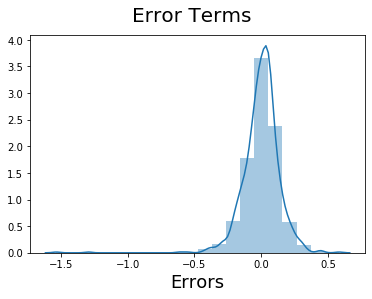

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### As you can see , the error terms are not normally distributed over mean, there is some left skewing which gives us a hint that there might be a case of overfitting
### We used only features we got from RFE

In [67]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.88

In [68]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

19.711783831879334
0.019306350471968006
0.13894729386342147


In [69]:
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [71]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.86

In [72]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

10.138936364331904
0.023148256539570557
0.15214551107269172


Text(0, 0.5, 'y_pred')

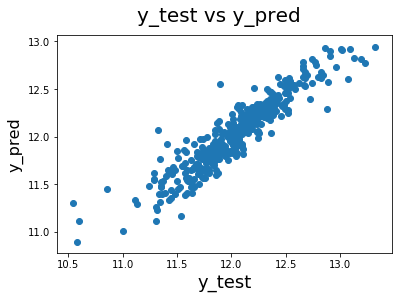

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### There is no much difference between actual and predicted values since we got good test accuracy and also above scatter plot is depicting close relation b/w y-test and y-test-pred

# using all features

In [74]:
#adding a constant variable
X_train_lm = sm.add_constant(X_train)

#create a RFE model
lm = sm.OLS(y_train,X_train_lm).fit()  #Running the linear Model

#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     67.89
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:13:51   Log-Likelihood:                 748.08
No. Observations:                1021   AIC:                            -1218.
Df Residuals:                     882   BIC:                            -533.1
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1083      0.205     54.254      0.000      10.706      11.510
LotFrontage             -0.0070      0.006     -1.175      0.240      -0.019       0.005
LotArea                  0.0189      0.005      3.607      0.000       0.009       0.029
OverallQual              0.0715      0.009      8.088      0.000       0.054       0.089
OverallCond              0.0342      0.006      5.767      0.000       0.023       0.046
YearRemodAdd             0.0245      0.007      3.389      0.001       0.010       0.039
MasVnrArea              -0.0056      0.006     -0.874      0.383      -0.018       0.007
ExterQual               -0.0126      0.013     -0.943      0.346      -0.039       0.014
BsmtQual                 0.0334      0.011      2.944      0.003       0.011       0.056
BsmtExposure             0.0236      0.005      4.494      0.000       0.013       0.034
BsmtFinType1             0.0105      0.003      3.257      0.001       0.004       0.017
BsmtFinSF1               0.0023      0.006      0.382      0.702      -0.009       0.014
BsmtFinSF2              -0.0014      0.004     -0.305      0.761      -0.010       0.007
BsmtUnfSF                0.0064      0.006      1.154      0.249      -0.004       0.017
TotalBsmtSF              0.0080      0.008      0.968      0.333      -0.008       0.024
HeatingQC                0.0103      0.006      1.731      0.084      -0.001       0.022
1stFlrSF                 0.0243      0.010      2.462      0.014       0.005       0.044
2ndFlrSF                 0.0425      0.011      3.993      0.000       0.022       0.063
LowQualFinSF             0.0023      0.005      0.474      0.636      -0.007       0.012
GrLivArea                0.0532      0.008      6.844      0.000       0.038       0.068
BsmtFullBath             0.0258      0.006      4.092      0.000       0.013       0.038
BsmtHalfBath             0.0049      0.005      1.069      0.285      -0.004       0.014
FullBath                 0.0221      0.008      2.910      0.004       0.007       0.037
HalfBath                 0.0181      0.007      2.687      0.007       0.005       0.031
BedroomAbvGr             0.0121      0.007      1.728      0.084      -0.002       0.026
KitchenAbvGr            -0.0216      0.006     -3.738      0.000      -0.033      -0.010
KitchenQual              0.0242      0.011      2.278      0.023       0.003       0.045
TotRmsAbvGrd             0.0282      0.010      2.886      0.004       0.009       0.047
Fireplaces              -0.0055      0.009     -0.608      0.544      -0.023       0.012
FireplaceQu              0.0148      0.005      2.866      0.004       0.005       0.025
GarageYrBlt             -0.0107      0.010     -1.123      0.262      -0.029       0.008
GarageCars               0.0412      0.011      3.676    

In [75]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

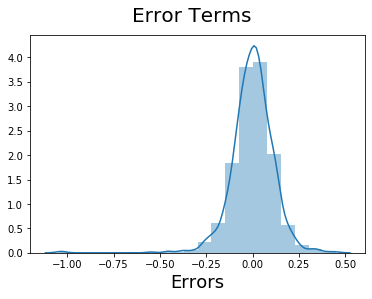

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### The error terms are not normally distributed over mean, there is some left skewing which gives us a hint that there might be a case of overfitting.

In [77]:
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.91

In [78]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

13.808414952004322
0.013524402499514516
0.11629446461252796


In [79]:
# Adding a constant variable 
X_test_n = sm.add_constant(X_test)

In [80]:
# Making predictions
y_pred = lm.predict(X_test_n)

In [81]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.88

In [82]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

8.921516982256422
0.020368760233462152
0.14271916561366996


Text(0, 0.5, 'y_pred')

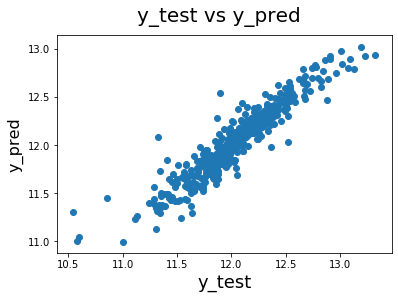

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

#### There is no much difference between actual and predicted values since we got good test accuracy and also above scatter plot is depicting close relation b/w y-test and y-test-pred

# Ridge

## Using Features from RFE

In [84]:
# Ridge Regularization

# considering different values of alpha for hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    4.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [85]:
# Creating dataframe for the cross validation
ridge= pd.DataFrame(ridge_grid_search.cv_results_)

ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017780,0.001216,0.002665,0.000197,0.001,{'alpha': 0.001},-0.045360,-0.024440,-0.017282,-0.018925,-0.024026,-0.026025,0.010085,23,-0.015356,-0.018581,-0.020413,-0.020007,-0.019001,-0.018672,0.001784
1,0.016223,0.000542,0.002320,0.001014,0.01,{'alpha': 0.01},-0.045326,-0.024433,-0.017216,-0.018934,-0.023985,-0.025998,0.010084,22,-0.015356,-0.018581,-0.020413,-0.020007,-0.019001,-0.018672,0.001784
2,0.013772,0.007260,0.003293,0.001266,0.05,{'alpha': 0.05},-0.045194,-0.024403,-0.016953,-0.018975,-0.023811,-0.025886,0.010081,21,-0.015359,-0.018583,-0.020417,-0.020008,-0.019004,-0.018674,0.001785
3,0.006223,0.000821,0.001992,0.000428,0.1,{'alpha': 0.1},-0.045057,-0.024368,-0.016678,-0.019023,-0.023612,-0.025767,0.010081,20,-0.015366,-0.018587,-0.020429,-0.020010,-0.019011,-0.018681,0.001785
4,0.005283,0.000698,0.002065,0.000191,0.2,{'alpha': 0.2},-0.044857,-0.024305,-0.016260,-0.019110,-0.023264,-0.025578,0.010086,18,-0.015389,-0.018604,-0.020465,-0.020020,-0.019036,-0.018703,0.001786
5,0.005558,0.001042,0.001860,0.000310,0.3,{'alpha': 0.3},-0.044729,-0.024250,-0.015965,-0.019185,-0.022969,-0.025438,0.010098,17,-0.015418,-0.018626,-0.020510,-0.020033,-0.019071,-0.018732,0.001787
6,0.006483,0.000583,0.002436,0.000820,0.4,{'alpha': 0.4},-0.044648,-0.024202,-0.015750,-0.019250,-0.022716,-0.025332,0.010113,16,-0.015451,-0.018654,-0.020560,-0.020049,-0.019111,-0.018765,0.001788
7,0.004470,0.000799,0.001529,0.000298,0.5,{'alpha': 0.5},-0.044601,-0.024159,-0.015590,-0.019309,-0.022497,-0.025250,0.010131,15,-0.015486,-0.018684,-0.020611,-0.020066,-0.019155,-0.018800,0.001789
8,0.003828,0.001024,0.001189,0.000192,0.6,{'alpha': 0.6},-0.044577,-0.024120,-0.015469,-0.019360,-0.022304,-0.025185,0.010151,13,-0.015520,-0.018715,-0.020662,-0.020084,-0.019201,-0.018836,0.001791
9,0.003890,0.000663,0.001183,0.000195,0.7,{'alpha': 0.7},-0.044571,-0.024085,-0.015376,-0.019406,-0.022133,-0.025133,0.010171,11,-0.015555,-0.018748,-0.020711,-0.020102,-0.019247,-0.018873,0.001792


In [86]:
# Displaying the best estimator variable
ridge_fin = ridge_grid_search.best_estimator_
ridge_fin

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
ridge_grid_search.best_score_

-0.024907475709920163

In [88]:
ridge_grid_search.best_params_

{'alpha': 3.0}

In [89]:
ridge_fin.fit(X_train_rfe, y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
y_train_predicted = ridge_fin.predict(X_train_rfe)

In [91]:
def evaluations(y_true, y_predicted):  
   
    # Calculating Mean Squared error
    mse = mean_squared_error(y_true, y_predicted)
    
    # Calculating Root Mean Squared error
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    
    # Calculating r2 Score
    r2_square = r2_score(y_true, y_predicted)
    
    print("Evaluation metrics")
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

In [92]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.019937115332844563
RMSE: 0.14119885032408927
R2 Square: 0.8731664879049972


#### Inference:

- The calculated **R-squared** value of train dataset is **0.8732**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

In [93]:
# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = list(ridge_fin.coef_)

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,OverallQual,0.110127
1,YearRemodAdd,0.051795
2,BsmtQual,0.031665
3,BsmtFinSF1,0.016926
4,BsmtFinSF2,0.004965
5,BsmtUnfSF,-0.016895
6,TotalBsmtSF,0.002478
7,1stFlrSF,0.065472
8,2ndFlrSF,0.056589
9,GrLivArea,0.054964


In [94]:
# top 10 correlated features
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
13,MSZoning_RL,0.202846
17,Neighborhood_ClearCr,0.150609
18,Neighborhood_Crawfor,0.147373
12,MSZoning_RH,0.143102
11,MSZoning_FV,0.133173
28,Exterior1st_BrkComm,-0.125925
15,LotShape_IR3,-0.124798
29,Exterior1st_BrkFace,0.110993
0,OverallQual,0.110127
40,GarageType_CarPort,-0.106450


In [95]:
X_test_rfe = X_test[X_train_rfe.columns]

In [96]:
y_test_predicted = ridge_fin.predict(X_test_rfe)

In [97]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.022906198272994414
RMSE: 0.15134793778903766
R2 Square: 0.8607865439970377


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8608**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

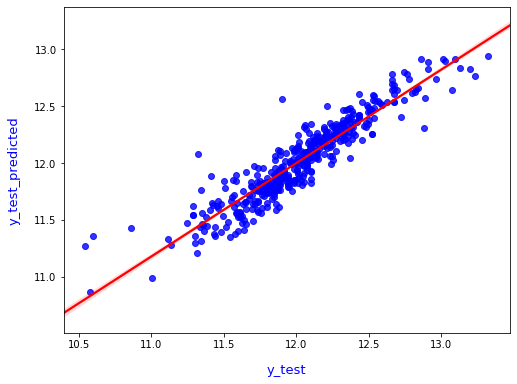

In [98]:
plt.figure(figsize=(8,6))

sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
          
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

plt.show()

#### There is no much difference between actual and predicted values since we got good test accuracy and also above scatter plot is depicting close relation b/w y-test and y-test-pred

## Using all features

In [99]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [100]:
ridge_tot= pd.DataFrame(ridge_grid_search.cv_results_)

ridge_tot

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008609,0.001720,0.001835,0.000505,0.001,{'alpha': 0.001},-0.044537,-0.022302,-0.019052,-0.024397,-0.019950,-0.026066,0.009444,26,-0.010654,-0.012537,-0.013482,-0.012568,-0.013383,-0.012525,0.001015
1,0.006053,0.001475,0.001432,0.000134,0.01,{'alpha': 0.01},-0.044506,-0.022270,-0.018950,-0.024345,-0.019882,-0.026009,0.009461,25,-0.010655,-0.012538,-0.013483,-0.012569,-0.013383,-0.012525,0.001015
2,0.005893,0.000838,0.001362,0.000163,0.05,{'alpha': 0.05},-0.044404,-0.022150,-0.018568,-0.024161,-0.019629,-0.025801,0.009527,24,-0.010662,-0.012545,-0.013492,-0.012575,-0.013390,-0.012533,0.001015
3,0.005953,0.001048,0.001529,0.000243,0.1,{'alpha': 0.1},-0.044323,-0.022031,-0.018206,-0.023993,-0.019367,-0.025602,0.009598,23,-0.010677,-0.012560,-0.013513,-0.012588,-0.013404,-0.012549,0.001017
4,0.005728,0.000850,0.001520,0.000362,0.2,{'alpha': 0.2},-0.044237,-0.021854,-0.017704,-0.023759,-0.018939,-0.025317,0.009719,22,-0.010713,-0.012598,-0.013569,-0.012621,-0.013445,-0.012589,0.001021
5,0.006788,0.000919,0.001814,0.000448,0.3,{'alpha': 0.3},-0.044205,-0.021723,-0.017375,-0.023596,-0.018592,-0.025117,0.009819,21,-0.010751,-0.012641,-0.013630,-0.012655,-0.013493,-0.012634,0.001027
6,0.008896,0.002316,0.001914,0.000527,0.4,{'alpha': 0.4},-0.044200,-0.021618,-0.017145,-0.023470,-0.018301,-0.024966,0.009903,19,-0.010788,-0.012684,-0.013691,-0.012690,-0.013543,-0.012679,0.001034
7,0.008078,0.001704,0.002191,0.000708,0.5,{'alpha': 0.5},-0.044210,-0.021532,-0.016976,-0.023367,-0.018052,-0.024846,0.009976,18,-0.010824,-0.012726,-0.013749,-0.012724,-0.013594,-0.012723,0.001041
8,0.008989,0.002127,0.002399,0.000480,0.6,{'alpha': 0.6},-0.044227,-0.021458,-0.016848,-0.023280,-0.017836,-0.024749,0.010040,17,-0.010858,-0.012768,-0.013803,-0.012756,-0.013644,-0.012766,0.001048
9,0.008120,0.001858,0.002222,0.000388,0.7,{'alpha': 0.7},-0.044249,-0.021393,-0.016747,-0.023204,-0.017645,-0.024667,0.010097,16,-0.010890,-0.012808,-0.013854,-0.012788,-0.013693,-0.012807,0.001054


In [101]:
# Displaying the best estimator variable
ridge_final = ridge_grid_search.best_estimator_
ridge_final

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [102]:
ridge_grid_search.best_score_

-0.023704746902115038

In [103]:
y_train_predicted = ridge_final.predict(X_train)

In [104]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.014957105032706882
RMSE: 0.12229924379450137
R2 Square: 0.9048477108949247


#### Inference:

- The calculated **R-squared** value of train dataset is **0.905**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

In [105]:
ridge_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = list(ridge_final.coef_)

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,LotFrontage,-0.002041
1,LotArea,0.018717
2,OverallQual,0.082438
3,OverallCond,0.041904
4,YearRemodAdd,0.021095
5,MasVnrArea,-0.000681
6,ExterQual,0.000927
7,BsmtQual,0.024184
8,BsmtExposure,0.020893
9,BsmtFinType1,0.010508


In [106]:
# top 10
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
57,Neighborhood_Crawfor,0.101847
67,Neighborhood_NridgHt,0.087727
2,OverallQual,0.082438
72,Neighborhood_Somerst,0.080351
43,MSZoning_RL,0.077719
58,Neighborhood_Edwards,-0.070991
61,Neighborhood_MeadowV,-0.064089
60,Neighborhood_IDOTRR,-0.063112
66,Neighborhood_NoRidge,0.062527
46,LotShape_IR3,-0.058754


In [107]:
X_test_rfe = X_test

In [108]:
y_test_predicted = ridge_final.predict(X_test)

In [109]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.02037907404869168
RMSE: 0.14275529429303727
R2 Square: 0.8761452557667145


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8761**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

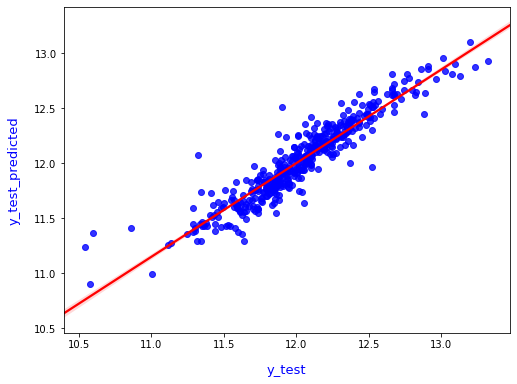

In [110]:
plt.figure(figsize=(8,6))

sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
          
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

plt.show()

#### There is no much difference between actual and predicted values since we got good test accuracy and also above scatter plot is depicting close relation b/w y-test and y-test-pred

#### Inference:

- Since Ridge doesnt do feature elimination , we wanna go with rfe features and do ridge regression on them
- Following features are having **positive**
    - MSZoning_RL
    - Neighborhood_Crawfor
    - Neighborhood_ClearCr
    - MSZoning_RH
    - MSZoning_FV
    - Exterior1st_BrkFace
    - OverallQual
    
    
- Following features are having **negative**
    - Exterior1st_BrkComm
    - LotShape_IR3
    - GarageType_CarPort

# Lasso

In [111]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
# Creating dataframe for the cross validation
lasso_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023497,0.003176,0.002203,0.000343,0.001,{'alpha': 0.001},-0.046996,-0.020452,-0.015151,-0.021409,-0.014817,-0.023788,0.011937,1,-0.013014,-0.015628,-0.016624,-0.015387,-0.016867,-0.015504,0.001367
1,0.009577,0.002184,0.002075,0.000574,0.01,{'alpha': 0.01},-0.048575,-0.022383,-0.017208,-0.024240,-0.016734,-0.025851,0.011753,2,-0.016891,-0.020600,-0.022397,-0.020787,-0.022453,-0.020626,0.002022
2,0.007126,0.001032,0.001601,0.000315,0.05,{'alpha': 0.05},-0.046522,-0.025117,-0.028372,-0.033489,-0.026569,-0.032028,0.007796,3,-0.025660,-0.030580,-0.032038,-0.030741,-0.031769,-0.030158,0.002318
3,0.007486,0.000815,0.001909,0.000390,0.1,{'alpha': 0.1},-0.057115,-0.034960,-0.046742,-0.051573,-0.041245,-0.046337,0.007738,4,-0.041279,-0.045264,-0.046528,-0.045331,-0.045963,-0.044873,0.001855
4,0.008323,0.001677,0.002093,0.000524,0.2,{'alpha': 0.2},-0.103845,-0.064275,-0.095344,-0.096849,-0.081161,-0.088310,0.014090,5,-0.086418,-0.087398,-0.088887,-0.086186,-0.086694,-0.087116,0.000974
5,0.008748,0.002979,0.002760,0.000853,0.3,{'alpha': 0.3},-0.154881,-0.101757,-0.144655,-0.143626,-0.124554,-0.133915,0.018822,6,-0.130672,-0.137315,-0.132206,-0.130181,-0.134989,-0.133072,0.002703
6,0.013570,0.005295,0.004189,0.001771,0.4,{'alpha': 0.4},-0.179776,-0.117830,-0.168508,-0.163915,-0.144963,-0.155023,0.021720,7,-0.151756,-0.158384,-0.153369,-0.151039,-0.155865,-0.154083,0.002715
7,0.010163,0.003185,0.002282,0.000549,0.5,{'alpha': 0.5},-0.179795,-0.123615,-0.169445,-0.167436,-0.148408,-0.157761,0.019847,8,-0.151772,-0.165596,-0.154209,-0.154664,-0.159393,-0.157127,0.004901
8,0.014841,0.007645,0.004046,0.001194,0.6,{'alpha': 0.6},-0.179795,-0.123615,-0.169445,-0.167436,-0.148408,-0.157761,0.019847,8,-0.151772,-0.165596,-0.154209,-0.154664,-0.159393,-0.157127,0.004901
9,0.011391,0.002935,0.004048,0.002427,0.7,{'alpha': 0.7},-0.179795,-0.123615,-0.169445,-0.167436,-0.148408,-0.157761,0.019847,8,-0.151772,-0.165596,-0.154209,-0.154664,-0.159393,-0.157127,0.004901


In [113]:
# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
y_train_predicted = lasso_best.predict(X_train)

In [116]:
evaluations( y_train, y_train_predicted)

Evaluation metrics
MSE: 0.016275915363092263
RMSE: 0.1275770957621009
R2 Square: 0.8964578639588242


#### Inference:

- The calculated **R-squared** value of train dataset is **0.8964**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

In [117]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = list(lasso_best.coef_)

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,LotFrontage,-0.000000
1,LotArea,0.018236
2,OverallQual,0.088281
3,OverallCond,0.045133
4,YearRemodAdd,0.016129
5,MasVnrArea,0.000000
6,ExterQual,0.000000
7,BsmtQual,0.016676
8,BsmtExposure,0.019004
9,BsmtFinType1,0.010517


In [118]:
top10 = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Displaying dataframe with top 10 feature returned from lasso model
top10

,Features,Coefficient
18,GrLivArea,0.104875
57,Neighborhood_Crawfor,0.103423
2,OverallQual,0.088281
72,Neighborhood_Somerst,0.086798
43,MSZoning_RL,0.075296
67,Neighborhood_NridgHt,0.072618
58,Neighborhood_Edwards,-0.063028
90,Exterior1st_BrkFace,0.054044
66,Neighborhood_NoRidge,0.053801
55,Neighborhood_ClearCr,0.050309


In [119]:
top5 = top10['Features'].iloc[:5].to_list()
top5

['GrLivArea',
 'Neighborhood_Crawfor',
 'OverallQual',
 'Neighborhood_Somerst',
 'MSZoning_RL']

In [120]:
y_test_predicted = lasso_best.predict(X_test)

In [121]:
evaluations(y_test, y_test_predicted)

Evaluation metrics
MSE: 0.020310831397572553
RMSE: 0.14251607417260886
R2 Square: 0.8765600035653616


#### Inference:

- The calculated **R-squared** value of test dataset is **0.8765**, which means the model is able to explain 90.29% variance in it. This a very **good r2_score** value.

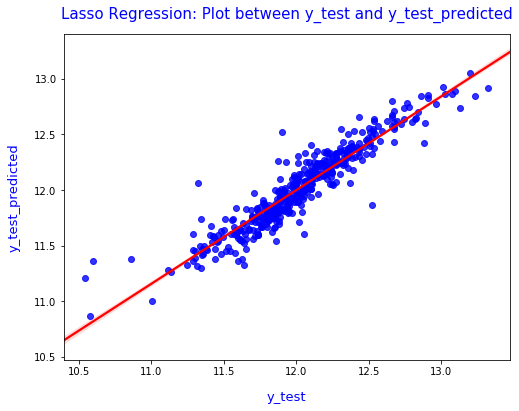

In [122]:
# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

#### There is no much difference between actual and predicted values since we got good test accuracy and also above scatter plot is depicting close relation b/w y-test and y-test-pred

#### Inference:

- Lasso does do feature elimination , so we perform model building on total train set
- Following features are having **positive**
    - GrLivArea
    - Neighborhood_Crawfor
    - OverallQual
    - Neighborhood_Somerst
    - MSZoning_RL
    - Neighborhood_NridgHt
    - Exterior1st_BrkFace
    - Neighborhood_NoRidge
    - Neighborhood_ClearCr
    
    
- Following features are having **negative**
    - Neighborhood_Edwards

## Final alpha values 
    - Ridge Regression ( alpha = 3.0)
    - Lasso Regression ( alpha = 0.001)

# Subjective Questions

<b>Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</b>

#### Ridge

In [123]:
ridge_new = Ridge(alpha = 6)

In [124]:
# Fitting the model
ridge_new.fit(X_train_rfe,y_train)

y_train_predicted_new = ridge_new.predict(X_train_rfe)

In [125]:
evaluations(y_train, y_train_predicted_new)

Evaluation metrics
MSE: 0.020393084764102547
RMSE: 0.1428043583512161
R2 Square: 0.8702657571117547


In [126]:
ridge_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = list(ridge_new.coef_)

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,OverallQual,0.113335
1,YearRemodAdd,0.052391
2,BsmtQual,0.032642
3,BsmtFinSF1,0.017288
4,BsmtFinSF2,0.005355
5,BsmtUnfSF,-0.016269
6,TotalBsmtSF,0.003601
7,1stFlrSF,0.062209
8,2ndFlrSF,0.052719
9,GrLivArea,0.058211


In [127]:
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
13,MSZoning_RL,0.149472
18,Neighborhood_Crawfor,0.133602
17,Neighborhood_ClearCr,0.130618
0,OverallQual,0.113335
15,LotShape_IR3,-0.101912
29,Exterior1st_BrkFace,0.101097
21,Neighborhood_NridgHt,0.091034
22,Neighborhood_Somerst,0.089935
20,Neighborhood_NoRidge,0.088474
44,BsmtCond_Gd,0.086897


In [128]:
X_test_rfe = X_test[X_train_rfe.columns]
y_test_predicted_new = ridge_new.predict(X_test_rfe)

In [129]:
evaluations(y_test, y_test_predicted_new)

Evaluation metrics
MSE: 0.02280077281245668
RMSE: 0.15099924772149256
R2 Square: 0.8614272720016262


#### Lasso

In [130]:
lasso_new = Lasso(alpha = 0.002)

In [131]:
lasso_new.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
y_train_predicted_new = lasso_new.predict(X_train)

In [133]:
evaluations(y_train, y_train_predicted_new)

Evaluation metrics
MSE: 0.01778484263248654
RMSE: 0.13335982390692686
R2 Square: 0.88685855423532


In [134]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = list(lasso_new.coef_)

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,LotFrontage,-0.000000
1,LotArea,0.018409
2,OverallQual,0.094669
3,OverallCond,0.043771
4,YearRemodAdd,0.015280
5,MasVnrArea,0.000000
6,ExterQual,0.000000
7,BsmtQual,0.016157
8,BsmtExposure,0.016431
9,BsmtFinType1,0.011138


In [135]:
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
18,GrLivArea,0.095426
2,OverallQual,0.094669
57,Neighborhood_Crawfor,0.061175
72,Neighborhood_Somerst,0.050207
58,Neighborhood_Edwards,-0.047694
30,GarageCars,0.044995
40,HouseAge,-0.044615
43,MSZoning_RL,0.044151
3,OverallCond,0.043771
44,MSZoning_RM,-0.029889


In [136]:
y_test_predicted_new = lasso_new.predict(X_test)

In [137]:
evaluations( y_test, y_test_predicted_new)

Evaluation metrics
MSE: 0.02077457605694001
RMSE: 0.1441338824043119
R2 Square: 0.873741574423867


<b>Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</b>

In [138]:
X_train_new = X_train.drop(top5, axis = 1)

In [139]:
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_new,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [140]:
# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
lasso_best.fit(X_train_new, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
y_train_predicted = lasso_best.predict(X_train_new)

In [143]:
evaluations(y_train, y_train_predicted)

Evaluation metrics
MSE: 0.018309666280594283
RMSE: 0.1353132154691266
R2 Square: 0.8835197950713823


In [144]:
# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_new.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,LotFrontage,-0.001784
1,LotArea,0.018069
2,OverallCond,0.053933
3,YearRemodAdd,0.017676
4,MasVnrArea,0.000904
5,ExterQual,0.023233
6,BsmtQual,0.032594
7,BsmtExposure,0.022699
8,BsmtFinType1,0.009678
9,BsmtFinSF1,0.000000


In [145]:
lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
57,Neighborhood_MeadowV,-0.110897
54,Neighborhood_Edwards,-0.095155
14,1stFlrSF,0.093723
15,2ndFlrSF,0.092373
56,Neighborhood_IDOTRR,-0.090289
63,Neighborhood_NridgHt,0.083111
62,Neighborhood_NoRidge,0.062502
39,MSZoning_FV,0.061102
85,Exterior1st_BrkFace,0.056908
2,OverallCond,0.053933


In [146]:
X_test_new = X_test.drop(top5, axis = 1)

# Perform prediction with rest predictor variables
y_test_predicted = lasso_best.predict(X_test_new)

In [147]:
evaluations( y_test, y_test_predicted)

Evaluation metrics
MSE: 0.022330968922313427
RMSE: 0.14943550087684462
R2 Square: 0.8642825263922068


In [148]:
top5 = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(5)

top5

,Features,Coefficient
57,Neighborhood_MeadowV,-0.110897
54,Neighborhood_Edwards,-0.095155
14,1stFlrSF,0.093723
15,2ndFlrSF,0.092373
56,Neighborhood_IDOTRR,-0.090289


# End